In [123]:
import matplotlib
import warnings
import pandas as pd
from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action="ignore")

fm = matplotlib.font_manager
fm._get_fontconfig_fonts.cache_clear(lab5)

In [124]:
def decision_tree_classification(X_train, X_test, y_train, y_test):
    """
    Perform decision tree classification.

    :param X_train: the training data
    :param X_test: the test data
    :param y_train: the training labels
    :param y_test: the test labels
    :return: the decision tree classifier
    """
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
    return clf


def svc_classification(X_train, X_test, y_train, y_test, kernel):
    """
    Perform SVC classification.

    :param X_train: the training data
    :param X_test: the test data
    :param y_train: the training labels
    :param y_test: the test labels
    :return: the SVC classifier
    """
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"SVC with kernel {kernel} accuracy:", accuracy_score(y_test, y_pred))
    return clf


def svc_classification_with_all_kernels(X_train, X_test, y_train, y_test):
    """
    Perform SVC classification with all listed kernels.

    :param X_train: the training data
    :param X_test: the test data
    :param y_train: the training labels
    :param y_test: the test labels
    :return: None
    """
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        svc_classification(X_train, X_test, y_train, y_test, kernel)


def scatter_3d_plot(X, y, labels):
    """
    Create a 3D scatter plot from provided data and labels.

    :param X: the data
    :param y: the labels
    :param labels: the labels for the plot
    :return: None
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    plt.show()


def visualize_decision_tree(clf, X, y):
    """
    Visualize the decision tree using dtreeviz.
    Data and labels are cast to float to avoid dtreeviz error.

    :param clf: the decision tree classifier
    :param X: the data
    :param y: the labels
    :return: None
    """
    return dtreeviz(clf, X.astype(float), y.astype(float), target_name='Classes', feature_names=X.columns,
                    class_names=list(y.unique()))

## Wheat Seeds dataset

In [125]:
seeds_data = pd.read_csv("seeds_dataset.txt", delim_whitespace=True)
seeds_data.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


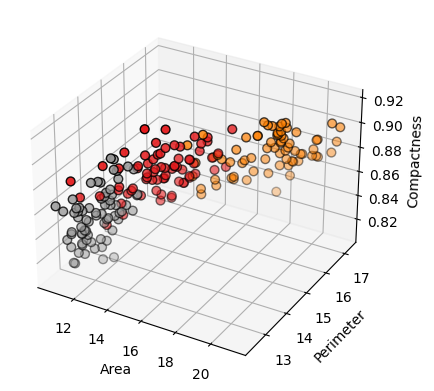

In [126]:
X = seeds_data.iloc[:, :-1]
y = seeds_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scatter_3d_plot(X, y, seeds_data.columns[:-1])

Decision Tree Accuracy: 0.9523809523809523


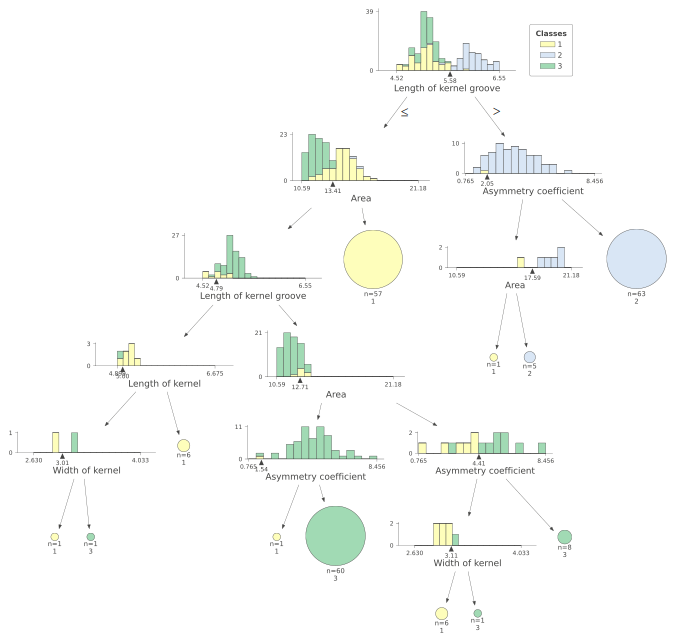

In [127]:
clf = decision_tree_classification(X_train, X_test, y_train, y_test)
visualize_decision_tree(clf, X, y)

In [128]:
svc_classification_with_all_kernels(X_train, X_test, y_train, y_test)

SVC with kernel linear accuracy: 0.9047619047619048
SVC with kernel poly accuracy: 0.8571428571428571
SVC with kernel rbf accuracy: 0.8571428571428571
SVC with kernel sigmoid accuracy: 0.16666666666666666


## Breast cancer dataset

In [129]:
breast_cancer_data = pd.read_csv("breast-cancer-wisconsin.data")
breast_cancer_data = breast_cancer_data[breast_cancer_data != '?'].dropna()
breast_cancer_data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


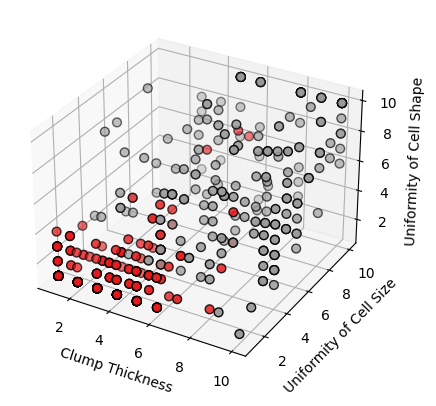

In [130]:
X = breast_cancer_data.iloc[:, 1:-1]
y = breast_cancer_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scatter_3d_plot(X, y, breast_cancer_data.columns[1:-1])

Decision Tree Accuracy: 0.9343065693430657


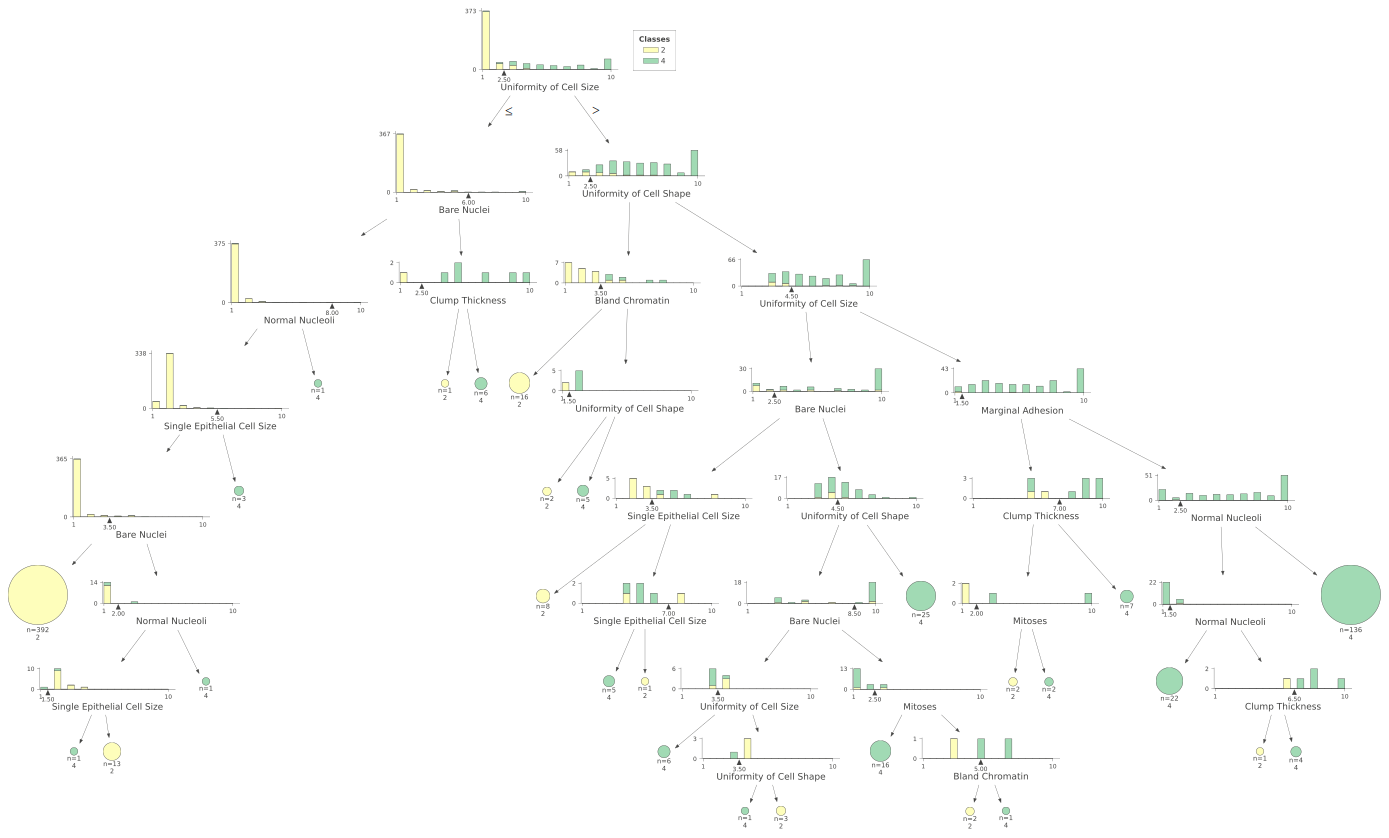

In [131]:
clf = decision_tree_classification(X_train, X_test, y_train, y_test)
visualize_decision_tree(clf, X, y)

In [132]:
svc_classification_with_all_kernels(X_train, X_test, y_train, y_test)

SVC with kernel linear accuracy: 0.9562043795620438
SVC with kernel poly accuracy: 0.9635036496350365
SVC with kernel rbf accuracy: 0.9635036496350365
SVC with kernel sigmoid accuracy: 0.4744525547445255


In [2]:
# Create neural network classifier using TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def neural_network_classification(X_train, X_test, y_train, y_test):
    """
    Perform neural network classification.

    :param X_train: the training data
    :param X_test: the test data
    :param y_train: the training labels
    :param y_test: the test labels
    :return: the neural network classifier
    """
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu", name="layer1"),
            layers.Dense(64, activation="relu", name="layer2"),
            layers.Dense(1, activation="sigmoid", name="layer3"),
        ]
    )
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Neural Network Accuracy:", accuracy)
    return model

# convert NumPy arrays to tensors



ModuleNotFoundError: No module named 'tensorflow'